<a href="https://colab.research.google.com/github/girishkarhana/Performing_EDA_on_Play-Store-Data.csv/blob/main/Performing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/Play Store Data.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [ ]:
df.index

RangeIndex(start=0, stop=10841, step=1)

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
df.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
10836,False
10837,False
10838,False
10839,False


In [ ]:
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
highest_rating= df.nlargest(1,'Rating')[['App','Rating','Size']]
print(highest_rating)

                                           App  Rating    Size
10472  Life Made WI-Fi Touchscreen Photo Frame    19.0  1,000+


In [ ]:
lowest_rating= df.nsmallest(1,'Rating')[['App','Rating','Size','Price']]
print(lowest_rating)

                         App  Rating  Size Price
625  House party - live chat     1.0  9.2M     0


In [ ]:
df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace('$', ''), errors='coerce') # convert the 'Price' column to string type before using .str.replace()
df['Price'] = df['Price'].fillna(0)  # Or any suitable value to replace NaN
df['Price'] = df['Price'].astype(float)

In [ ]:
highest_price= df.nlargest(1,'Price')[['App','Price','Size','Rating']]
print(highest_price)

                           App  Price  Size  Rating
4367  I'm Rich - Trump Edition  400.0  7.3M     3.6


In [ ]:
lowest_price= df.nsmallest(1,'Price')[['App','Price','Size','Rating']]
print(lowest_price)

                                              App  Price Size  Rating
0  Photo Editor & Candy Camera & Grid & ScrapBook    0.0  19M     4.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [ ]:
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').fillna(0)
df['Installs'] = df['Installs'].astype(float)

In [ ]:
def size_to_mb(size):
  if 'M' in size:
    return float(size.replace('M', ''))
  elif 'k' in size:
    return float(size.replace('k', '')) / 1024
  else:
    return np.nan

In [ ]:
df['size_mb'] = df['Size'].replace('Varies with device',np.nan).dropna().apply(size_to_mb)

In [ ]:
df.dropna(subset=['Rating'],inplace=True)

In [ ]:
df.dropna(subset=['Reviews','Current Ver','Android Ver'],inplace=True)

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
 13  size_mb         7723 non-null   float64
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [ ]:
df[df['Content Rating']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.700000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.800000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619k,1000.0,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,0.604492
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,2.600000
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,53.000000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3.600000


In [ ]:
df[df['Type']=='Paid'][['App','Price']]

,App,Price
234,TurboScan: scan documents and receipts in PDF,4.99
235,Tiny Scanner Pro: PDF Doc Scan,4.99
290,TurboScan: scan documents and receipts in PDF,4.99
291,Tiny Scanner Pro: PDF Doc Scan,4.99
427,Puffin Browser Pro,3.99
...,...,...
10690,FO Bixby,0.99
10697,Mu.F.O.,0.99
10760,Fast Tract Diet,7.99
10782,Trine 2: Complete Story,16.99


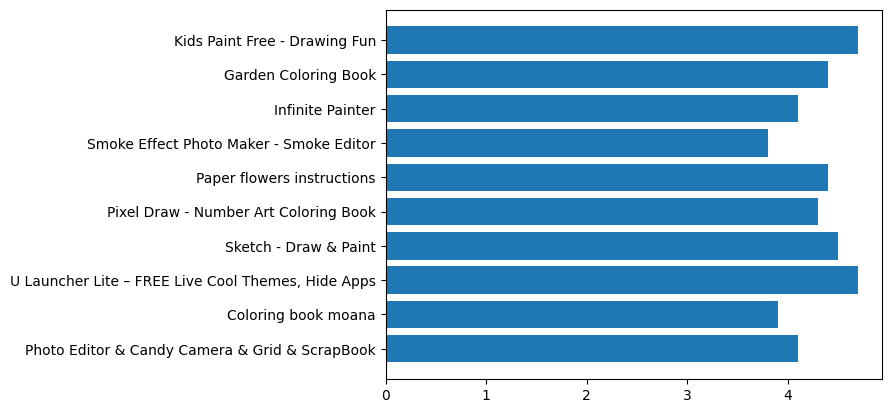

In [ ]:
y=df['Rating'].head(10)
x=df['App'].head(10)
plt.barh(x,y)
plt.show()

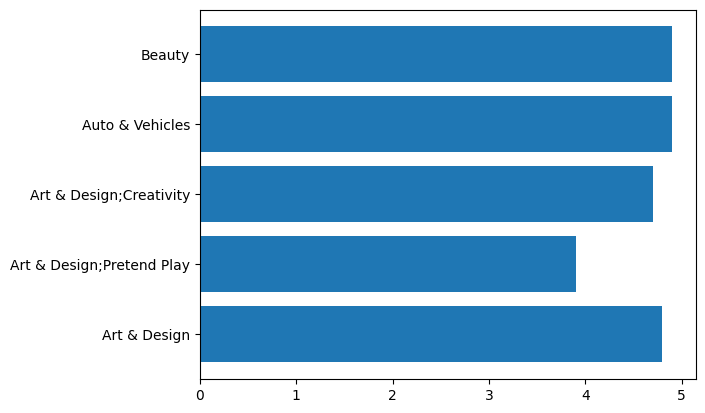

In [ ]:
y=df['Rating'].head(100)
x=df['Genres'].head(100)
plt.barh(x,y)
plt.show()

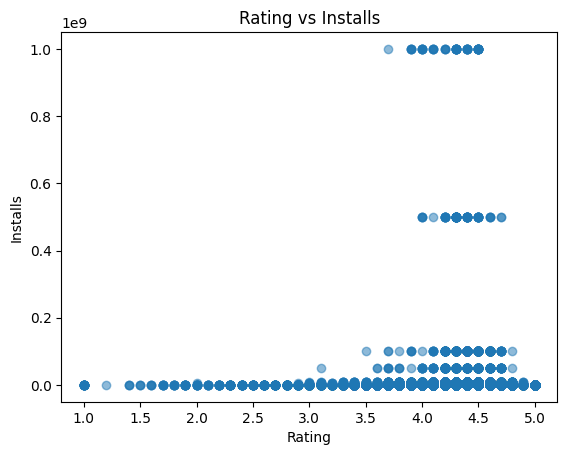

In [ ]:
plt.scatter(df['Rating'],df['Installs'],alpha=0.5)
plt.title('Rating vs Installs')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

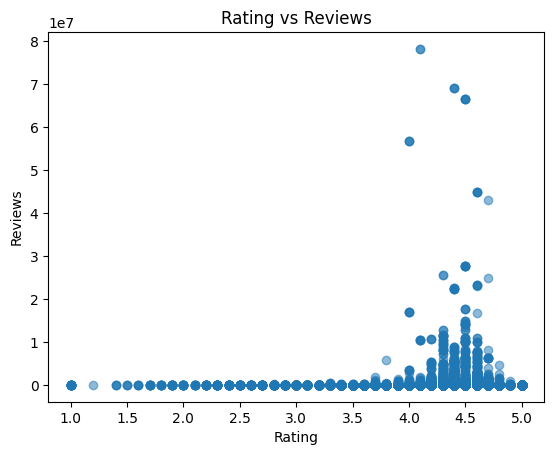

In [ ]:
plt.scatter(df['Rating'],df['Reviews'],alpha=0.5)
plt.title('Rating vs Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

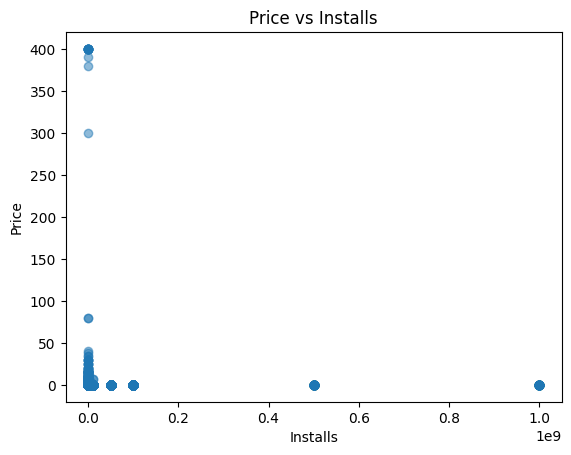

In [ ]:
plt.scatter(df['Installs'],df['Price'],alpha=0.5)
plt.title('Price vs Installs')
plt.xlabel('Installs')
plt.ylabel('Price')
plt.show()

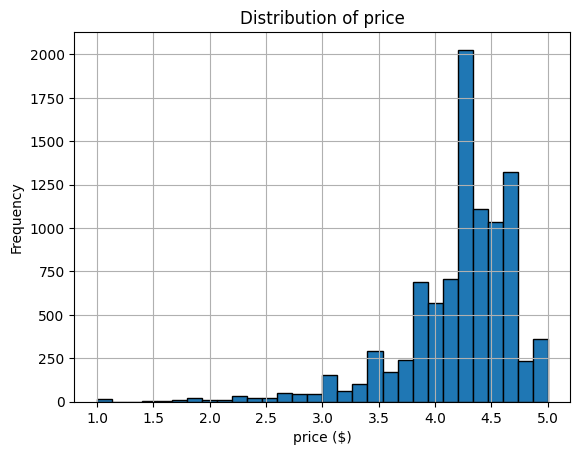

In [ ]:
df['Rating'].hist(bins=30, edgecolor='black')
plt.title('Distribution of price')
plt.xlabel('price ($)')
plt.ylabel('Frequency')
plt.show()

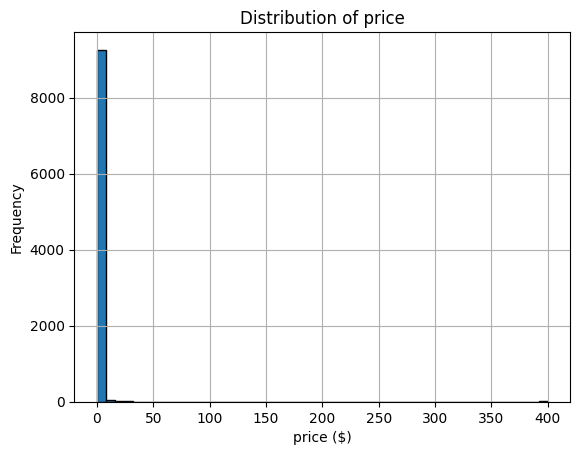

In [ ]:
df['Price'].hist(bins=50, edgecolor='black')
plt.title('Distribution of price')
plt.xlabel('price ($)')
plt.ylabel('Frequency')
plt.show()

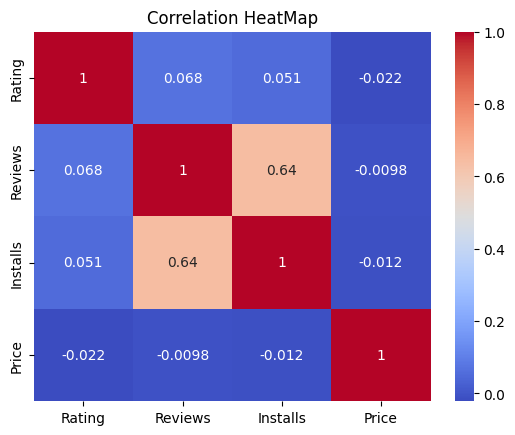

In [ ]:
corr=df[['Rating','Reviews','Installs','Price']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation HeatMap')
plt.show()

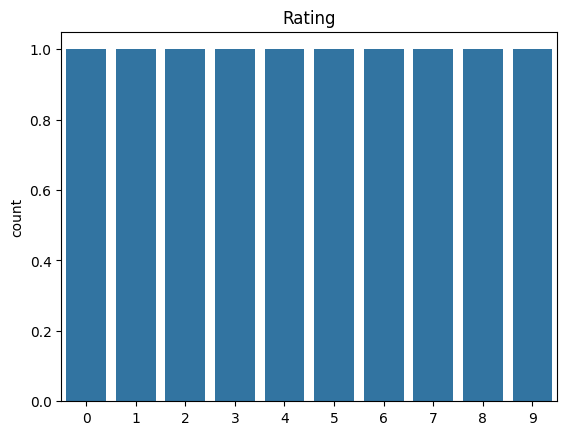

In [ ]:
y=df['Rating'].head(10)
sns.countplot(y)
plt.title('Rating')
plt.show()

In [ ]:
category_count=df['Category'].value_counts().reset_index()
category_count.columns=['Category','Count']
category_count.head()

,Category,Count
0,FAMILY,1746
1,GAME,1097
2,TOOLS,733
3,PRODUCTIVITY,351
4,MEDICAL,350


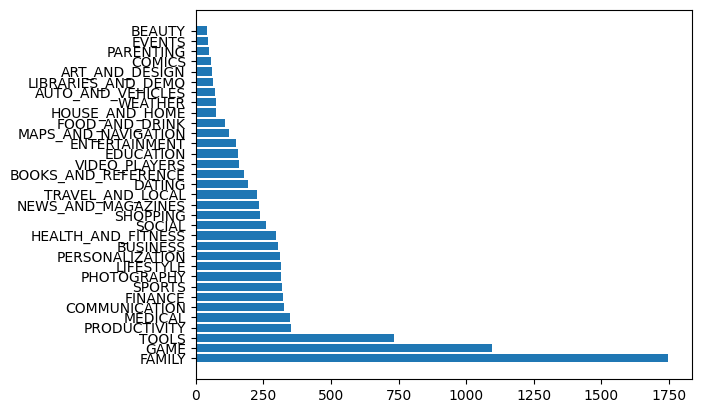

In [ ]:
x=category_count['Count']
y=category_count['Category']
plt.barh(y,x)
plt.show()

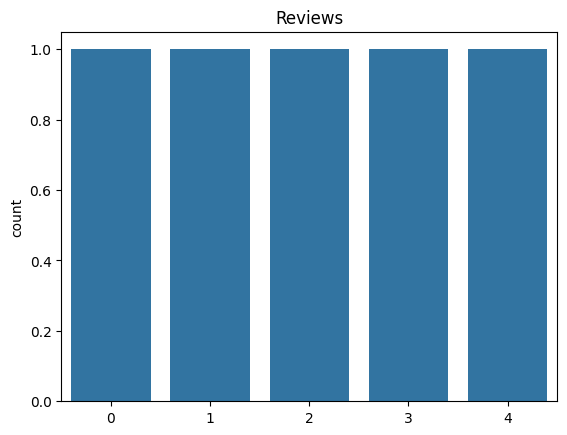

In [ ]:
y=df['Reviews'].head()
sns.countplot(y)
plt.title('Reviews')
plt.show()

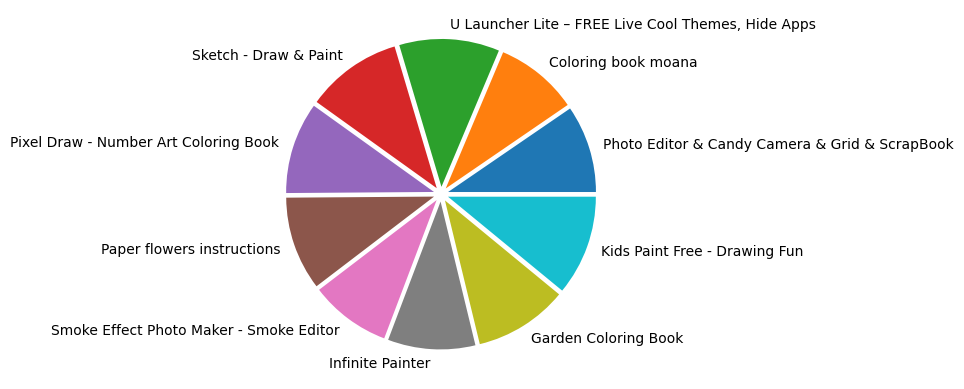

In [ ]:
y = df['Rating'].head(10)
mylables = df['App'].head(10)
y = y.dropna()
plt.pie(y, labels=mylables,explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05))
plt.show()

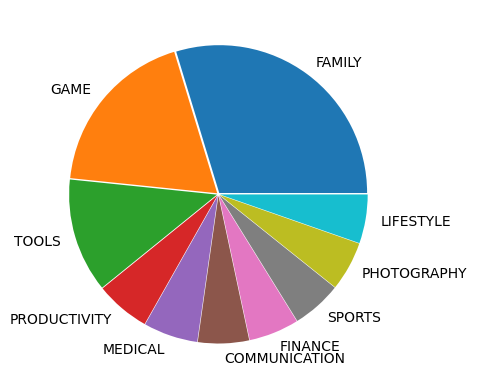

In [ ]:
y = category_count['Count'].head(10)
mylables = category_count['Category'].head(10)
y = y.dropna()
plt.pie(y, labels=mylables,explode=(0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01))
plt.show()

In [ ]:
android_ver_count=df['Android Ver'].value_counts().reset_index()
android_ver_count.columns=['Android Ver','Count']
android_ver_count.head()

,Android Ver,Count
0,4.1 and up,2059
1,Varies with device,1319
2,4.0.3 and up,1240
3,4.0 and up,1129
4,4.4 and up,875


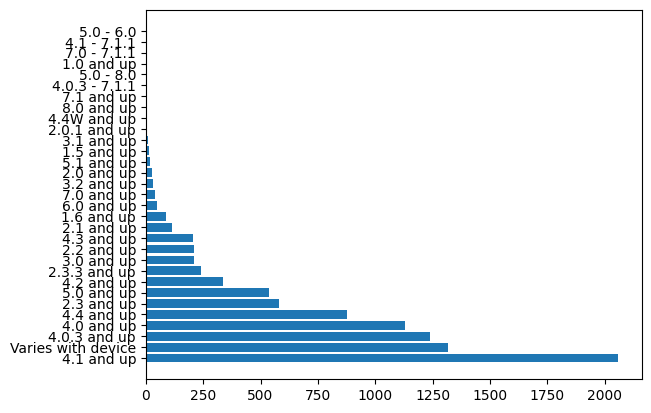

In [ ]:
x=android_ver_count['Count']
y=android_ver_count['Android Ver']
plt.barh(y,x)
plt.show()

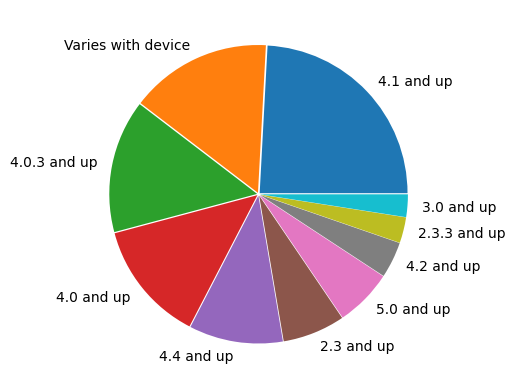

In [ ]:
y = android_ver_count['Count'].head(10)
mylables = android_ver_count['Android Ver'].head(10)
y = y.dropna()
plt.pie(y, labels=mylables,explode=(0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01))
plt.show()

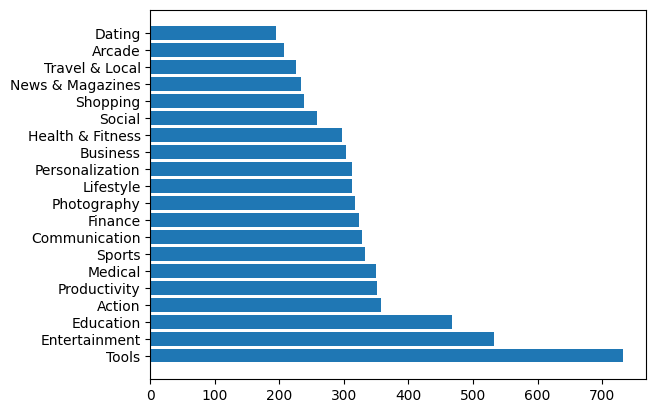

In [ ]:
genres_count=df['Genres'].value_counts().reset_index()
genres_count.columns=['Genres','Count']
genres_count.head()
x=genres_count['Count'].head(20)
y=genres_count['Genres'].head(20)
plt.barh(y,x)
plt.show()

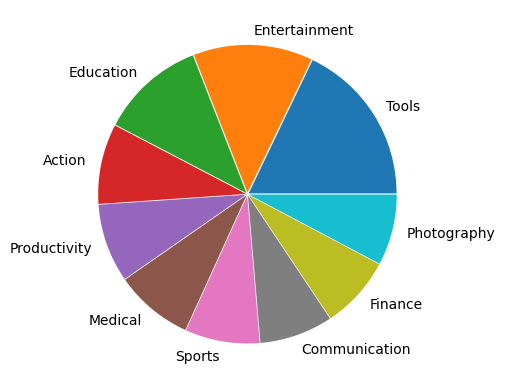

In [ ]:
y = genres_count['Count'].head(10)
mylables = genres_count['Genres'].head(10)
y = y.dropna()
plt.pie(y, labels=mylables,explode=(0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01))
plt.show()